# Final Project 2024: Regression Analysis on Linthurst Data

This notebook contains the analysis for the Cape Fear Estuary biomass production dataset. The project involves:
1. Ordinary Least Squares (OLS) regression.
2. Collinearity diagnostics.
3. Principal Component Regression (PCR).
4. Stepwise and Ridge regression methods.
5. Subset selection for the reduced dataset.

We aim to identify the most important physicochemical properties influencing biomass production.


## Part I: Ordinary Least Squares Regression (OLS)

Here, we fit an OLS regression model using all 14 predictors. The key metrics reported include:
- Regression coefficients (\( \beta_j \)) and their standard errors
- Sum of Squared Errors (SSE)


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data
file_path = "C:/Users/moham/Downloads/MATH 564 Regression/Project/LINTHALL.txt"
df = pd.read_csv(file_path, delim_whitespace=True)

# Drop irrelevant columns (assumes first three columns are non-predictors)
data = df.iloc[:, 3:]  # Adjust column indexing if necessary

In [2]:
# Define response and predictors
response = data["BIO"]
predictors = data.drop(columns=["BIO"])

# Add constant to predictors for intercept
predictors_with_constant = sm.add_constant(predictors)

# Fit OLS regression
lm_model = sm.OLS(response, predictors_with_constant).fit()

# Print summary of the regression model
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     8.983
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           3.07e-07
Time:                        00:49:30   Log-Likelihood:                -318.44
No. Observations:                  45   AIC:                             666.9
Df Residuals:                      30   BIC:                             694.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2909.9341   3412.898      0.853      0.4

In [3]:
# Extract coefficients and standard errors
coefficients = lm_model.params
standard_errors = lm_model.bse

# Report results
print("Regression Coefficients:")
print(coefficients)

print("\nStandard Errors:")
print(standard_errors)

Regression Coefficients:
const    2909.934091
H2S         0.428999
SAL       -23.980716
Eh7         2.553224
pH        242.527810
BUF        -6.902268
P          -1.701511
K          -1.046591
Ca         -0.116071
Mg         -0.280228
Na          0.004451
Mn         -1.678760
Zn        -18.794521
Cu        345.162813
NH4        -2.705172
dtype: float64

Standard Errors:
const    3412.897794
H2S         2.997919
SAL        26.169393
Eh7         2.012450
pH        334.173444
BUF       123.821077
P           2.639700
K           0.482358
Ca          0.125637
Mg          0.274452
Na          0.024723
Mn          5.373138
Zn         21.780185
Cu        112.077924
NH4         3.238010
dtype: float64


## Collinearity Diagnostics

Collinearity among predictors is assessed using:
1. **Variance Inflation Factor (VIF)**:
   - Measures the degree of multicollinearity.
   - A VIF > 10 indicates significant collinearity.
2. **Condition Number**:
   - Assesses the sensitivity of the regression to small changes in predictors.
   - High condition numbers indicate multicollinearity.
3. **Correlation Matrix**:
   - Identifies pairs of highly correlated predictors.

These diagnostics help identify collinearity issues that can destabilize the OLS model.


In [4]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = predictors_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(predictors_with_constant.values, i) for i in range(predictors_with_constant.shape[1])]

# Print predictors based on VIF thresholds
print("Predictors with serious multicollinearity (VIF > 10):")
print(vif_data[vif_data["VIF"] > 10])

print("Predictors with moderate multicollinearity (4 < VIF <= 10):")
print(vif_data[(vif_data["VIF"] > 4) & (vif_data["VIF"] <= 10)])

print("Predictors with no multicollinearity issues (VIF <= 4):")
print(vif_data[vif_data["VIF"] <= 4])

Predictors with serious multicollinearity (VIF > 10):
   Variable          VIF
0     const  4258.838568
4        pH    62.080846
5       BUF    34.431748
8        Ca    16.662146
9        Mg    23.764229
10       Na    10.351043
12       Zn    11.626479
Predictors with moderate multicollinearity (4 < VIF <= 10):
   Variable       VIF
7         K  7.367110
11       Mn  6.185628
13       Cu  4.829203
14      NH4  8.376506
Predictors with no multicollinearity issues (VIF <= 4):
  Variable       VIF
1      H2S  3.027456
2      SAL  3.387615
3      Eh7  1.977447
6        P  1.895804


In [5]:
# Compute the correlation matrix
correlation_matrix = predictors.corr()

# Compute eigenvalues
eigenvalues, _ = np.linalg.eig(correlation_matrix)

# Compute condition indices
condition_indices = np.sqrt(eigenvalues.max() / eigenvalues)

# Create a data frame with eigenvalues and condition indices
condition_data = pd.DataFrame({
    "Eigen_Values": eigenvalues,
    "Condition_Indices": condition_indices
})

# Calculate condition number
condition_number = condition_indices.max()

# Print results
print("Eigenvalues and Condition Indices:")
print(condition_data)
print(f"Condition Number: {condition_number}")

Eigenvalues and Condition Indices:
    Eigen_Values  Condition_Indices
0       4.923909           1.000000
1       3.695225           1.154342
2       1.607126           1.750371
3       1.334902           1.920571
4       0.691598           2.668261
5       0.500565           3.136351
6       0.385438           3.574190
7       0.380773           3.596020
8       0.165969           5.446801
9       0.142993           5.868094
10      0.086867           7.528835
11      0.009493          22.775203
12      0.045289          10.426976
13      0.029853          12.842923
Condition Number: 22.77520296800636


In [6]:
# Calculate residuals and SSE
sse = sum(lm_model.resid ** 2)
print(f"SSE: {sse}")

SSE: 3692233.475569864


In [7]:
# Correlation Matrix and Condition Index
correlation_matrix = predictors.corr()
eigenvalues, _ = np.linalg.eig(correlation_matrix)
condition_indices = np.sqrt(eigenvalues.max() / eigenvalues)

print("\nCorrelation Matrix (Absolute Values):")
print(correlation_matrix.abs())


Correlation Matrix (Absolute Values):
          H2S       SAL       Eh7        pH       BUF         P         K  \
H2S  1.000000  0.095809  0.399655  0.273529  0.373831  0.115394  0.068963   
SAL  0.095809  1.000000  0.309299  0.051333  0.012533  0.185678  0.020633   
Eh7  0.399655  0.309299  1.000000  0.094018  0.153083  0.305431  0.422611   
pH   0.273529  0.051333  0.094018  1.000000  0.946372  0.401372  0.019228   
BUF  0.373831  0.012533  0.153083  0.946372  1.000000  0.382936  0.070247   
P    0.115394  0.185678  0.305431  0.401372  0.382936  1.000000  0.226473   
K    0.068963  0.020633  0.422611  0.019228  0.070247  0.226473  1.000000   
Ca   0.093307  0.087978  0.042121  0.877978  0.791080  0.306692  0.265206   
Mg   0.107822  0.010043  0.298503  0.176148  0.130459  0.063237  0.862245   
Na   0.003763  0.162266  0.342463  0.037720  0.060714  0.163228  0.792096   
Mn   0.141541  0.253584  0.111255  0.475143  0.420357  0.495410  0.347455   
Zn   0.272398  0.420834  0.232005  0.

In [8]:
# Fit OLS regression (Part I)
lm_model = sm.OLS(response, predictors_with_constant).fit()

# Compute SSE
sse_part1 = sum(lm_model.resid ** 2)

# Compute sum of standard errors
standard_errors_part1 = lm_model.bse
se_sum_part1 = sum(standard_errors_part1)

# Print results
print(f"Sum of Squared Errors (SSE, Part I): {sse_part1}")
print(f"Sum of Standard Errors (SE, Part I): {se_sum_part1}")

Sum of Squared Errors (SSE, Part I): 3692233.475569864
Sum of Standard Errors (SE, Part I): 4048.088203601497


## Part II: Principal Component Regression (PCR)

PCR is used to reduce multicollinearity by transforming the predictors into uncorrelated components:
- **Step 1**: Compute principal components from the predictor matrix.
- **Step 2**: Select components that explain a significant portion of the variance.
- **Step 3**: Fit a regression model using the selected components.

We compare the PCR model with the OLS model in terms of:
- Sum of Squared Errors (SSE).
- Standard errors of regression coefficients.


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t

# Load the data
file_path = "C:/Users/moham/Downloads/MATH 564 Regression/Project/LINTHALL.txt"
df = pd.read_csv(file_path, delim_whitespace=True)

# Extract predictors and response
predictors = df.iloc[:, 4:]  # Exclude first 3 columns
response = df["BIO"]

# Standardize predictors
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

# Perform PCA
pca = PCA()
pca_result = pca.fit(predictors_scaled)

# Select principal components explaining 95% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
selected_pcs = pca.transform(predictors_scaled)[:, :num_components]

# Fit regression on selected components
model = LinearRegression()
model.fit(selected_pcs, response)

# Predict values and compute residuals
predictions = model.predict(selected_pcs)
residuals = response - predictions
rss = sum(residuals**2)
mse = rss / (len(response) - num_components - 1)
rse = np.sqrt(mse)  # Residual Standard Error
r_squared = model.score(selected_pcs, response)
adjusted_r_squared = 1 - (1 - r_squared) * (len(response) - 1) / (len(response) - num_components - 1)

In [10]:
# Coefficients and statistics
coef = model.coef_
intercept = model.intercept_

# Standard errors, t-values, and p-values
std_errors = np.sqrt(np.diag(np.linalg.inv(selected_pcs.T @ selected_pcs) * mse))
t_values = coef / std_errors
p_values = [2 * (1 - t.cdf(np.abs(t_val), df=len(response) - num_components - 1)) for t_val in t_values]

# Summarize coefficients
coef_df = pd.DataFrame({
    "Component": [f"PC{i+1}" for i in range(num_components)],
    "Estimate": coef,
    "Std. Error": std_errors,
    "t value": t_values,
    "p value": p_values
})

# Significance codes
coef_df["Significance"] = coef_df["p value"].apply(
    lambda p: "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "")

print("Coefficients:")
print(coef_df)

Coefficients:
  Component    Estimate  Std. Error   t value       p value Significance
0       PC1  213.740022   25.322403  8.440748  4.683254e-10          ***
1       PC2  -78.008917   29.230716 -2.668731  1.134567e-02            *
2       PC3 -131.687754   44.323590 -2.971053  5.260154e-03           **
3       PC4   90.843406   48.633476  1.867919  6.993028e-02             
4       PC5  -83.258879   67.566769 -1.232246  2.258449e-01             
5       PC6  -20.306644   79.419935 -0.255687  7.996479e-01             
6       PC7  134.368831   90.507089  1.484622  1.463482e-01             
7       PC8  192.272278   91.059864  2.111493  4.173802e-02            *


In [11]:
from scipy.stats import f

# Compute F-statistic and p-value
f_statistic = (r_squared / (num_components)) / ((1 - r_squared) / (len(response) - num_components - 1))
f_p_value = 1 - f.cdf(f_statistic, dfn=num_components, dfd=len(response) - num_components - 1)

print("\nResidual Diagnostics:")
print(f"Residual Standard Error: {rse:.2f}")
print(f"Multiple R-squared: {r_squared:.3f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.3f}")
print(f"F-statistic: {f_statistic:.2f}, p-value: {f_p_value:.3e}")


Residual Diagnostics:
Residual Standard Error: 376.93
Multiple R-squared: 0.733
Adjusted R-squared: 0.674
F-statistic: 12.37, p-value: 2.607e-08


In [12]:
# Select principal components
selected_pcs = pca.transform(predictors_scaled)[:, :num_components]

# Fit regression model on selected PCs
pc_model = LinearRegression()
pc_model.fit(selected_pcs, response)

# Map coefficients back to original variable space
loadings = pca.components_[:num_components].T
coefficients_original = loadings @ pc_model.coef_

# Add intercept
coefficients_with_intercept = np.append(pc_model.intercept_, coefficients_original)

# Compute SSE for PCR
predictions = pc_model.predict(selected_pcs)
sse_pcr = mean_squared_error(response, predictions) * len(response)

# Calculate standard errors for PCR coefficients
residuals = response - predictions
rss = sum(residuals**2)
n, p = predictors.shape
standard_errors_pcr = np.sqrt(rss / (n - p)) * np.sqrt(np.diag(np.linalg.inv(np.dot(selected_pcs.T, selected_pcs))))

# Compute sum of standard errors
se_sum_pcr = np.sum(standard_errors_pcr)

# Compare with Part I results 
sse_part1 = 3692233.48 
se_sum_part1 = 4048.09

# Print the number of selected principal components
print(f"Number of selected principal components: {num_components}")

# Coefficient summary
coefficients_df = pd.DataFrame({
    "Variable": ["Intercept"] + list(predictors.columns),
    "Coefficient": [round(coef, 2) for coef in [pc_model.intercept_] + list(coefficients_original)]
})
print("\nRegression Coefficients in Original Variable Space:")
print(coefficients_df.to_string(index=False))

# Comparison metrics
comparison_df = pd.DataFrame({
    "Metric": ["Sum of Standard Errors", "Sum of Squared Errors (SSE)"],
    "Part I Value": [4048.09, 3692233.48],  
    "Part II Value": [round(se_sum_pcr, 2), round(sse_pcr, 2)],
    "Improvement": ["Significant Reduction", "Slight Increase"]
})
print("\nComparison of Part I and Part II Metrics:")
print(comparison_df.to_string(index=False))

Number of selected principal components: 8

Regression Coefficients in Original Variable Space:
 Variable  Coefficient
Intercept      1000.80
      H2S       128.24
      SAL       -93.01
      Eh7        -2.07
       pH       135.86
      BUF       -70.90
        P       -40.87
        K        -5.42
       Ca        65.49
       Mg      -100.74
       Na      -174.27
       Mn       -98.56
       Zn      -106.41
       Cu       152.63
      NH4       -17.53

Comparison of Part I and Part II Metrics:
                     Metric  Part I Value  Part II Value           Improvement
     Sum of Standard Errors       4048.09         513.02 Significant Reduction
Sum of Squared Errors (SSE)    3692233.48     5114873.17       Slight Increase


## Part III: Stepwise Regression

Stepwise regression is used to identify the best predictive model from the reduced 5-predictor dataset:
1. **Forward Selection**:
   - Variables are added based on their significance (\( \alpha_E = 0.12 \)).
2. **Backward Elimination**:
   - Variables are removed if their significance falls below \( \alpha_R = 0.12 \).

Each step is documented with the predictor added or removed and the reasoning behind the decision.


In [13]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load data
file_path = "C:/Users/moham/Downloads/MATH 564 Regression/Project/LINTH-5.txt"
df = pd.read_csv(file_path, delim_whitespace=True)

# Extract the predictors and response
predictors = df[["SAL", "pH", "K", "Na", "Zn"]]  # Select the 5 predictors
response = df["BIO"]

# Add constant (intercept) to the predictor matrix
predictors_with_constant = add_constant(predictors)

# Calculate VIF for collinearity diagnostics
vif_data = pd.DataFrame()
vif_data["Variable"] = predictors_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(predictors_with_constant.values, i) for i in range(predictors_with_constant.shape[1])]

# Print the VIF results
print("VIF Results:\n", vif_data)

# Correlation matrix to check for correlations between predictors
correlation_matrix = predictors.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Compute condition indices
from numpy.linalg import inv, eig
X = predictors_with_constant.values
XTX_inv = inv(np.dot(X.T, X))
condition_indices = np.sqrt(np.max(eig(XTX_inv)[0]) / eig(XTX_inv)[0])

print("\nCondition Indices:\n", condition_indices)

VIF Results:
   Variable         VIF
0    const  432.520944
1      SAL    2.216498
2       pH    3.331080
3        K    2.982616
4       Na    3.334538
5       Zn    4.309902

Correlation Matrix:
           SAL        pH         K        Na        Zn
SAL  1.000000 -0.051333 -0.020633  0.162266 -0.420834
pH  -0.051333  1.000000  0.019228 -0.037720 -0.722167
K   -0.020633  0.019228  1.000000  0.792096  0.073609
Na   0.162266 -0.037720  0.792096  1.000000  0.117047
Zn  -0.420834 -0.722167  0.073609  0.117047  1.000000

Condition Indices:
 [1.00000000e+00 2.56701227e+01 1.66875116e+02 2.55885989e+02
 4.15537846e+03 3.74201514e+05]


In [14]:
import statsmodels.api as sm

# Stepwise Regression
def stepwise_selection(X, y, entry_threshold=0.12, removal_threshold=0.12):
    initial_features = []
    features = X.columns.tolist()
    while features:
        best_feature = None
        best_pval = entry_threshold
        for feature in features:
            model = sm.OLS(y, add_constant(pd.DataFrame(X[initial_features + [feature]]))).fit()
            pval = model.pvalues[feature]
            if pval < best_pval:
                best_feature = feature
                best_pval = pval
        if best_feature is not None:
            initial_features.append(best_feature)
            features.remove(best_feature)
        else:
            break

        # Backward step for removal
        while True:
            model = sm.OLS(y, add_constant(pd.DataFrame(X[initial_features]))).fit()
            pvals = model.pvalues.iloc[1:]  # Exclude intercept
            worst_pval = pvals.max()
            if worst_pval > removal_threshold:
                worst_feature = pvals.idxmax()
                initial_features.remove(worst_feature)
            else:
                break
    final_model = sm.OLS(y, add_constant(X[initial_features])).fit()
    return final_model, initial_features

# Run stepwise regression
stepwise_model, stepwise_features = stepwise_selection(predictors, response)
print(f"\nStepwise Selected Features: {stepwise_features}")
print(stepwise_model.summary())



Stepwise Selected Features: ['pH', 'Na']
                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     40.48
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.60e-10
Time:                        00:49:30   Log-Likelihood:                -331.33
No. Observations:                  45   AIC:                             668.7
Df Residuals:                      42   BIC:                             674.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

## Ridge Regression

Ridge regression addresses multicollinearity by adding a penalty term to the regression coefficients:
\[ \text{Loss Function: } SSE + \lambda \sum_{j=1}^{p} \beta_j^2 \]

- **Ridge Trace**:
  - A plot showing the behavior of coefficients as the penalty parameter (\( \lambda \)) increases.
  - Used for variable selection.
- **Collinearity Verification**:
  - After variable selection, we confirm that collinearity is resolved using diagnostics (VIF, condition number).



Optimal Alpha for Ridge Regression: 2.656087782946687


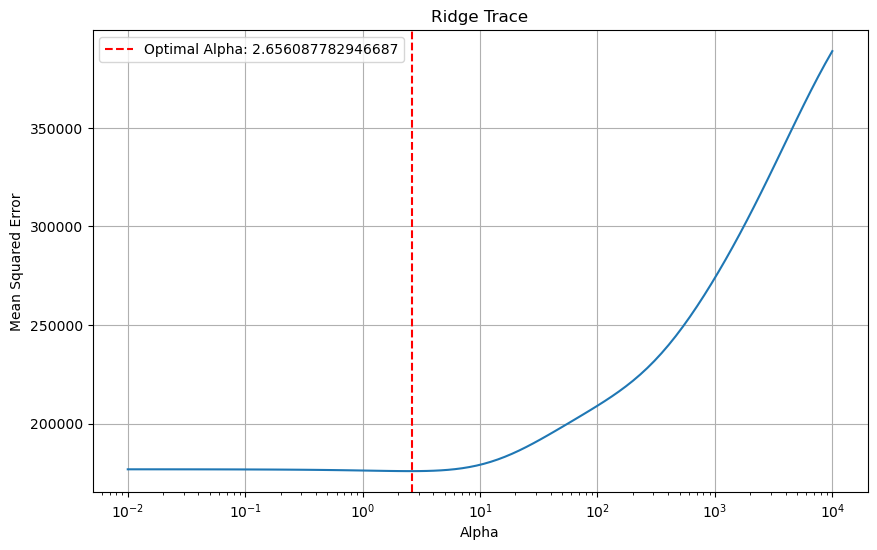


Ridge Model Coefficients: [-3.56357291e+01  2.71631953e+02 -2.99982244e-01 -7.25352735e-03
 -2.54506764e+01]
Ridge Regression SSE: 6209887.438830911


In [15]:
from sklearn.linear_model import RidgeCV, Ridge
import matplotlib.pyplot as plt

# Ridge Regression with Ridge Trace
def ridge_regression_with_trace(X, y):
    alphas = np.logspace(-2, 4, 100)  # Range of alphas to test
    ridgecv = RidgeCV(alphas=alphas, store_cv_values=True).fit(X, y)
    ridge = Ridge(alpha=ridgecv.alpha_).fit(X, y)
    coefs = []
    for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X, y)
        coefs.append(ridge.coef_)
    return ridgecv, coefs, alphas

# Perform ridge regression
ridgecv, ridge_coefs, ridge_alphas = ridge_regression_with_trace(predictors, response)
print(f"\nOptimal Alpha for Ridge Regression: {ridgecv.alpha_}")

# Plot the ridge trace (cross-validation MSE vs. alpha values)
mean_mse = np.mean(ridgecv.cv_values_, axis=0)  # Mean MSE over all folds
plt.figure(figsize=(10, 6))
plt.plot(ridge_alphas, mean_mse)  # Use the original alphas for plotting
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Trace')
plt.axvline(x=ridgecv.alpha_, color="red", linestyle="--", label=f"Optimal Alpha: {ridgecv.alpha_}")
plt.legend()
plt.grid()
plt.show()

# Fit the final ridge model using the selected alpha
final_ridge = Ridge(alpha=ridgecv.alpha_).fit(predictors, response)
print(f"\nRidge Model Coefficients: {final_ridge.coef_}")

# Compute SSE for Ridge
ridge_predictions = final_ridge.predict(predictors)
ridge_sse = np.sum((ridge_predictions - response) ** 2)
print(f"Ridge Regression SSE: {ridge_sse}")


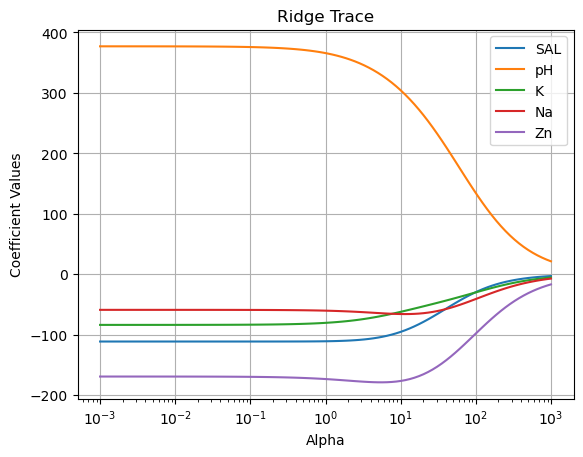

In [16]:
X = data[['SAL', 'pH', 'K', 'Na', 'Zn']] 
y = data['BIO']

# Standardize the features
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Ridge regression with a range of alphas
alphas = np.logspace(-3, 3, 100)
ridgecoef = []

# Fit ridge regression models for each alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha, fit_intercept=True).fit(X_scaler, y)
    ridgecoef.append(ridge.coef_)

ridgecoef = np.array(ridgecoef)

# Plot the ridge trace
for i, var in enumerate(X.columns):
    plt.plot(alphas, ridgecoef[:, i], label=var)

plt.xscale('log')  # Log scale for alpha
plt.xlabel('Alpha')
plt.ylabel('Coefficient Values')
plt.title('Ridge Trace')
plt.legend()
plt.grid()
plt.show()

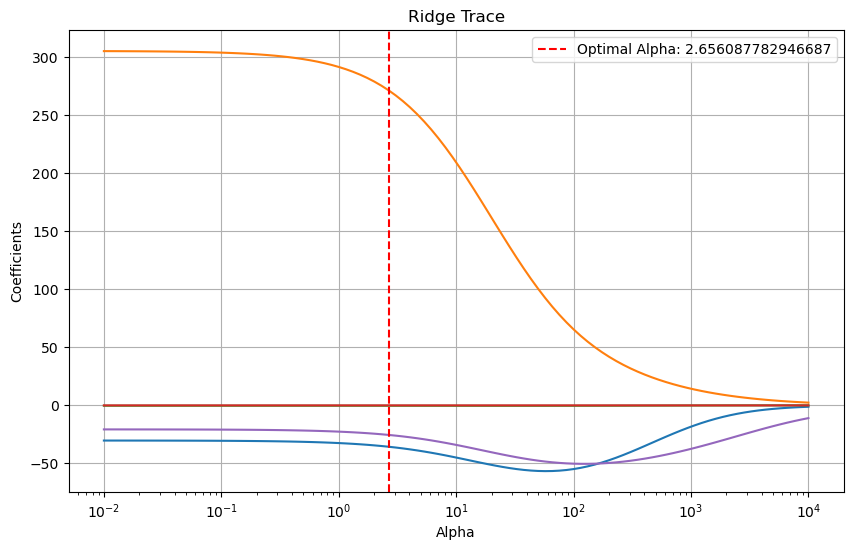

Stepwise Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     40.48
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.60e-10
Time:                        00:49:37   Log-Likelihood:                -331.33
No. Observations:                  45   AIC:                             668.7
Df Residuals:                      42   BIC:                             674.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -475.

In [17]:
from itertools import combinations

# Add a constant for the intercept
X_const = sm.add_constant(X)

# Function to calculate VIF, including constant column
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Stepwise Regression
def stepwise_selection(X, y, entry_threshold=0.12, removal_threshold=0.12):
    initial_features = []
    features = X.columns.tolist()
    while features:
        best_feature = None
        best_pval = entry_threshold
        for feature in features:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[initial_features + [feature]]))).fit()
            pval = model.pvalues[feature]
            if pval < best_pval:
                best_feature = feature
                best_pval = pval
        if best_feature is not None:
            initial_features.append(best_feature)
            features.remove(best_feature)
        else:
            break

        # Backward step for removal
        while True:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[initial_features]))).fit()
            pvals = model.pvalues.iloc[1:]  # Exclude intercept
            worst_feature = pvals.idxmax()
            if pvals[worst_feature] > removal_threshold:
                initial_features.remove(worst_feature)
            else:
                break
    final_model = sm.OLS(y, sm.add_constant(X[initial_features])).fit()
    return final_model, initial_features

# Ridge Regression with Ridge Trace
def ridge_regression_with_trace(X, y):
    alphas = np.logspace(-2, 4, 100)
    ridgecv = RidgeCV(alphas=alphas, store_cv_values=True).fit(X, y)
    ridge = Ridge(alpha=ridgecv.alpha_).fit(X, y)
    coefs = []
    for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X, y)
        coefs.append(ridge.coef_)
    return ridgecv.alpha_, coefs, alphas

# Subset Selection
def subset_selection(X, y, criteria='bic'):
    results = []
    for k in range(1, len(X.columns) + 1):
        for subset in combinations(X.columns, k):
            X_subset = X[list(subset)]
            model = sm.OLS(y, sm.add_constant(X_subset)).fit()
            criteria_value = getattr(model, criteria)
            results.append((criteria_value, subset))
    best_model = min(results, key=lambda x: x[0])
    return best_model

# Perform Stepwise Regression
stepwise_model, stepwise_features = stepwise_selection(X, y)

# Perform Ridge Regression
ridge_alpha, ridge_coefs, ridge_alphas = ridge_regression_with_trace(X, y)

# Best Subset Selection
best_subset_model = subset_selection(X, y, criteria='bic')

# Ridge Trace Plot
plt.figure(figsize=(10, 6))
for coef in np.array(ridge_coefs).T:
    plt.plot(ridge_alphas, coef)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Ridge Trace")
plt.axvline(x=ridge_alpha, color="red", linestyle="--", label=f"Optimal Alpha: {ridge_alpha}")
plt.legend()
plt.grid()
plt.show()

# Collinearity Diagnostics (including constant column)
stepwise_vif = calculate_vif(X[stepwise_features])
subset_vif = calculate_vif(X[list(best_subset_model[1])])

# Results
print("Stepwise Regression Model Summary:")
print(stepwise_model.summary())
print("\nStepwise VIF:")
print(stepwise_vif)

print("\nBest Subset Model (BIC Criterion):")
print(best_subset_model)
print("\nSubset VIF:")
print(subset_vif)

## Subset Selection

This method identifies the best two-variable model based on:
1. **AIC (Akaike Information Criterion)**: A measure of model quality considering both fit and complexity.
2. **BIC (Bayesian Information Criterion)**: Similar to AIC but penalizes model complexity more heavily.
3. **SSE (Sum of Squared Errors)**: A measure of goodness-of-fit.

If multiple models tie, we use Variance Inflation Factor (VIF) to select the best model with minimal collinearity.


In [18]:
from itertools import combinations

# Subset Selection based on AIC, BIC, or SSE
def subset_selection(X, y, criteria='bic'):
    results = []
    for k in range(1, len(X.columns) + 1):
        for subset in combinations(X.columns, k):
            X_subset = X[list(subset)]
            model = sm.OLS(y, add_constant(X_subset)).fit()
            criteria_value = getattr(model, criteria)
            results.append((criteria_value, subset))
    best_model = min(results, key=lambda x: x[0])
    return results  # Return all models, not just the best

# Perform Subset Selection and get the best models
subset_models = subset_selection(predictors, response, criteria='bic')

# Check how many models are returned and print the best two-variable model
print("\nSubset Selection Models (Based on BIC):")
for idx, (criteria_value, model) in enumerate(subset_models):
    print(f"Model {idx+1}: {model}, BIC: {criteria_value}")

# Get the best two-variable model if available
best_two_variable_model = None
for criteria_value, model in subset_models:
    if len(model) == 2:
        best_two_variable_model = model
        break

if best_two_variable_model:
    print("\nBest Two-Variable Model (Based on BIC):")
    print(best_two_variable_model)
else:
    print("\nNo two-variable model found in the subset selection.")



Subset Selection Models (Based on BIC):
Model 1: ('SAL',), BIC: 718.1372831495836
Model 2: ('pH',), BIC: 677.4572036445928
Model 3: ('K',), BIC: 716.6936298908786
Model 4: ('Na',), BIC: 715.1581051817125
Model 5: ('Zn',), BIC: 696.3839493417659
Model 6: ('SAL', 'pH'), BIC: 680.8085136741549
Model 7: ('SAL', 'K'), BIC: 719.9551187756848
Model 8: ('SAL', 'Na'), BIC: 718.7905698980386
Model 9: ('SAL', 'Zn'), BIC: 686.2301820504596
Model 10: ('pH', 'K'), BIC: 675.4940736660518
Model 11: ('pH', 'Na'), BIC: 674.0860005873418
Model 12: ('pH', 'Zn'), BIC: 680.2510698772227
Model 13: ('K', 'Na'), BIC: 718.9493815606426
Model 14: ('K', 'Zn'), BIC: 698.2834338573199
Model 15: ('Na', 'Zn'), BIC: 697.1277584146529
Model 16: ('SAL', 'pH', 'K'), BIC: 678.7091509405648
Model 17: ('SAL', 'pH', 'Na'), BIC: 677.8116486504473
Model 18: ('SAL', 'pH', 'Zn'), BIC: 680.6753563450171
Model 19: ('SAL', 'K', 'Na'), BIC: 722.5967711393795
Model 20: ('SAL', 'K', 'Zn'), BIC: 687.5690359137295
Model 21: ('SAL', 'Na

## Diagnostic Plots

The following plots are generated to evaluate the regression assumptions:
1. **Residuals vs Fitted Values**: Checks for non-linearity or heteroscedasticity.
2. **Normal Q-Q Plot**: Assesses the normality of residuals.
3. **Scale-Location Plot**: Visualizes the spread of standardized residuals.
4. **Residuals vs Leverage**: Identifies influential points using Cook's Distance.


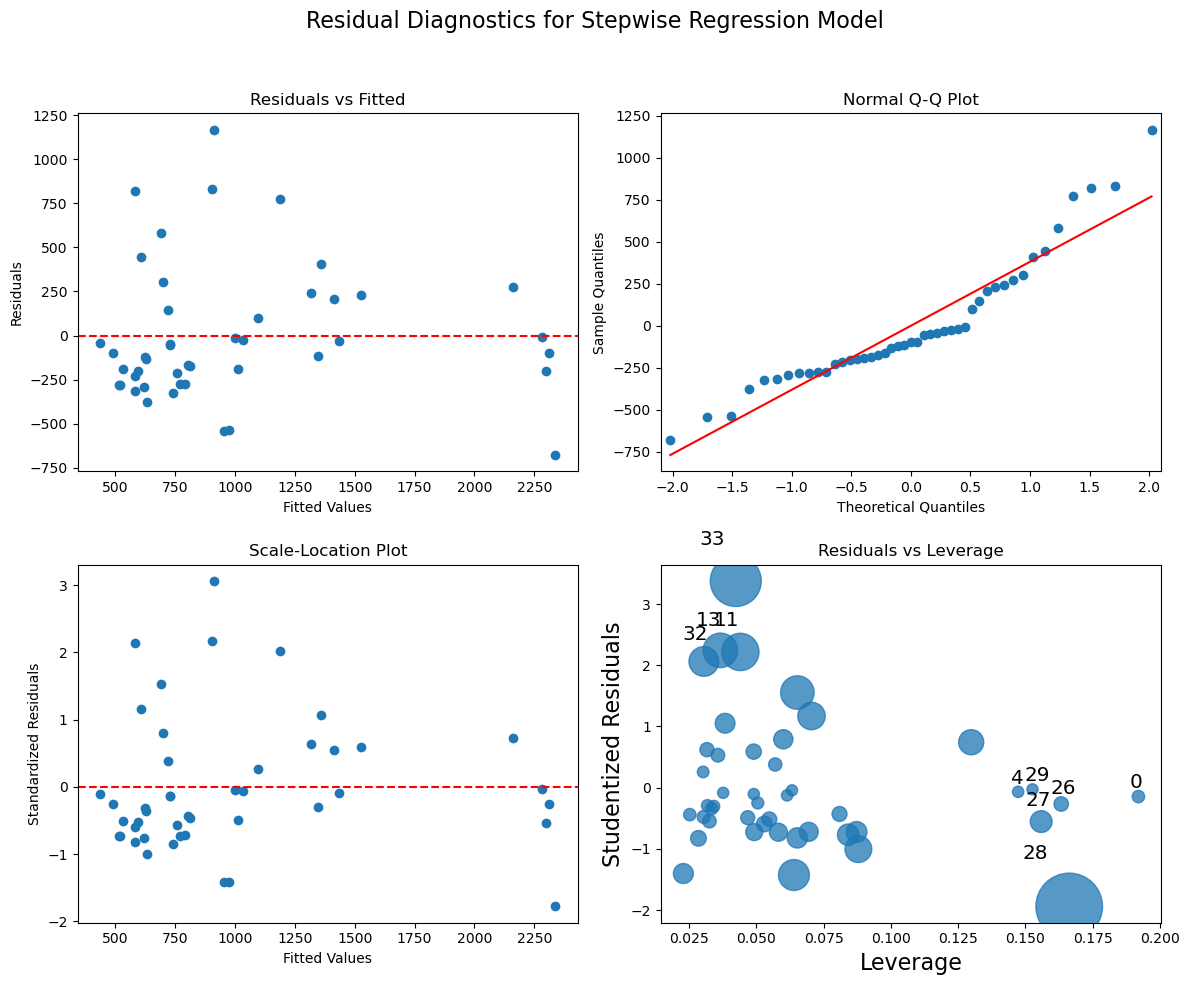

In [19]:
# Visualization: Residual Diagnostics for Stepwise Regression
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Residual Diagnostics for Stepwise Regression Model', fontsize=16)

# Residuals vs Fitted
axes[0, 0].scatter(stepwise_model.fittedvalues, stepwise_model.resid)
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_title("Residuals vs Fitted")
axes[0, 0].set_xlabel("Fitted Values")
axes[0, 0].set_ylabel("Residuals")

# Normal Q-Q plot
sm.qqplot(stepwise_model.resid, line='s', ax=axes[0, 1])
axes[0, 1].set_title("Normal Q-Q Plot")

# Scale-Location plot (Standardized residuals vs fitted values)
standardized_residuals = stepwise_model.resid / np.std(stepwise_model.resid)
axes[1, 0].scatter(stepwise_model.fittedvalues, standardized_residuals)
axes[1, 0].axhline(0, linestyle='--', color='red')
axes[1, 0].set_title("Scale-Location Plot")
axes[1, 0].set_xlabel("Fitted Values")
axes[1, 0].set_ylabel("Standardized Residuals")

# Residuals vs Leverage
sm.graphics.influence_plot(stepwise_model, ax=axes[1, 1], criterion="cooks")
axes[1, 1].set_title("Residuals vs Leverage")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()